In [2]:
import os
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
from scipy.stats import norm
from scipy.stats import t

sns.set(style="darkgrid")
sns.set_context("poster")


# Data Dictionary for future use:

In [3]:
df = pd.read_csv('tic_2000_train_data.csv')

In [4]:
df.keys()

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [5]:
df.MOSTYPE

0       33
1       37
2       37
3        9
4       40
        ..
5817    36
5818    35
5819    33
5820    34
5821    33
Name: MOSTYPE, Length: 5822, dtype: int64

In [6]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [7]:
import sweetviz
#get quick descriptive summary of info

#for more info on package, please see: https://github.com/fbdesignpro/sweetviz
#create quick copy for ease of use
report_data = pd.DataFrame.copy(df)

In [8]:
#rename cols for prelim report ease
report_data.rename(columns={'MOSTYPE': 'Customer Subtype L0', 'MAANTHUI':'Number of houses 1 ñ 10', 'MGEMOMV' : 'Avg size household 1 ñ 6',
                   'MGEMLEEF':'Avg age see L1', 'MOSHOOFD': 'Customer main type see L2', 'MGODRK': 'Roman catholic see L3',
                   'MGODPR': 'Protestant','MGODOV' : 'Other religion', 'MGODGE': 'No religion','MRELGE' :'Married',
                   'MRELSA' : 'Living together','MRELOV' : 'Other relation','MFALLEEN' : 'Singles','MFGEKIND' : 'Household without children',
                   'MFWEKIND' : 'Household with children','MOPLHOOG' : 'High level education','MOPLMIDD' : 'Medium level education',
                   'MOPLLAAG' : 'Lower level education','MBERHOOG' : 'High status','MBERZELF' : 'Entrepreneur','MBERBOER' : 'Farmer',
                   'MBERMIDD' : 'Middle management','MBERARBG' : 'Skilled labourers','MBERARBO' : 'Unskilled labourers',
                   'MSKA' : 'Social class A','MSKB1' : 'Social class B1','MSKB2' : 'Social class B2','MSKC' : 'Social class C',
                   'MSKD' : 'Social class D','MHHUUR' : 'Rented house','MHKOOP' : 'Home owners','MAUT1' : '1 car','MAUT2' : '2 cars',
                   'MAUT0' : 'No car','MZFONDS' : 'National Health Service','MZPART' : 'Private health insurance','MINKM30' : 'Income < 30.000',
                   'MINK3045' : 'Income 30-45.000','MINK4575' : 'Income 45-75.000','MINK7512' : 'Income 75-122.000','MINK123M' : 'Income >123.000',
                   'MINKGEM' : 'Average income','MKOOPKLA' : 'Purchasing power class','PWAPART' : 'Contribution private third party insurance see L4','PWABEDR' : 'Contribution third party insurance (firms)',
                   'PWALAND' : 'Contribution third party insurance (agriculture)','PPERSAUT' : 'Contribution car policies','PBESAUT' : 'Contribution delivery van policies',
                   'PMOTSCO' : 'Contribution motorcycle/scooter policies','PVRAAUT' : 'Contribution lorry policies','PAANHANG' : 'Contribution trailer policies',
                   'PTRACTOR' : 'Contribution tractor policies','PWERKT' : 'Contribution agricultural machines policies','PBROM' : 'Contribution moped policies',
                   'PLEVEN' : 'Contribution life insurances','PPERSONG' : 'Contribution private accident insurance policies',
                   'PGEZONG' : 'Contribution family accidents insurance policies','PWAOREG' : 'Contribution disability insurance policies','PBRAND' : 'Contribution fire policies',
                   'PZEILPL' : 'Contribution surfboard policies','PPLEZIER' : 'Contribution boat policies','PFIETS' : 'Contribution bicycle policies',
                   'PINBOED' : 'Contribution property insurance policies','PBYSTAND' : 'Contribution social security insurance policies','AWAPART' : 'Number of private third party insurance 1 - 12',
                   'AWABEDR' : 'Number of third party insurance (firms)','AWALAND' : 'Number of third party insurance (agriculture)','APERSAUT' : 'Number of car policies',
                   'ABESAUT' : 'Number of delivery van policies','AMOTSCO' : 'Number of motorcycle/scooter policies', 'AVRAAUT' : 'Number of lorry policies','AAANHANG': 'Number of trailer policies',
                   'ATRACTOR' : 'Number of tractor policies','AWERKT' : 'Number of agricultural machines policies','ABROM' : 'Number of moped policies',
                   'ALEVEN' : 'Number of life insurances', 'APERSONG' : 'Number of private accident insurance policies','AGEZONG' : 'Number of family accidents insurance policies',
                   'AWAOREG' : 'Number of disability insurance policies','ABRAND' :'Number of fire policies','AZEILPL' :'Number of surfboard policies','APLEZIER' :'Number of boat policies',
                   'AFIETS' :'Cycle_p','AINBOED' :'Prop_p','ABYSTAND' :'SS_p','CARAVAN' :'MHome_p'},
          inplace=True)

In [9]:
cfg = sweetviz.FeatureConfig(force_cat=["Customer Subtype L0",
                                       "Avg age see L1", "Customer main type see L2",
                                       "Roman catholic see L3","Contribution private third party insurance see L4"])
report_prelim= sweetviz.analyze([report_data, "Train"], target_feat= "MHome_p", feat_cfg = cfg)

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:21  -> (00:00 left)


Creating Associations graph... DONE!


In [10]:
report_prelim.show_html("Report_prelim.html")

In [11]:
#take note of the features which explain the details of CARAVAN. There are 14 main features that explain atleast 60% of our target:

#1) Contribution car policies 0.07
#2) Contribution fire policies 0.05
#3) Number of car policies 0.05
#4) Customer Subtype L0 0.05
#5) Customer main type see L2 0.03
#6) Average income 0.03
#7) Purchasing power class 0.03
#8) Income < 30.000 0.02
#9) Lower level education 0.02
#10) Contribution private third party insurance see L4 0.02
#11) No car 0.02
#12) Number of private third party insurance 1 - 12 0.02
#13) Rented house 0.02
#14) Home owners 0.02

# Using PCA to find features

In [12]:
from sklearn.preprocessing import StandardScaler
features = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['CARAVAN']].values.ravel()
# Standardizing the features

In [14]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create a PCA instance with 95% of the variation explaining the data
pca = PCA(.95)

# Fit the data
principalDf = pca.fit_transform(x)

# Plot the explained variances
features_n = range(pca.n_components_)

pd.DataFrame(pca.components_, columns=df.loc[:,features].columns, index=['pc_1', 'pc_2', 'pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10','pc_11','pc_12','pc_13','pc_14',
                         'pc_15','pc_16','pc_17','pc_18','pc_19','pc_20','pc_21','pc_22','pc_23','pc_24','pc_25','pc_26','pc_27','pc_28',
                         'pc_29','pc_30','pc_31','pc_32','pc_33','pc_34','pc_35','pc_36','pc_37','pc_38','pc_39','pc_40','pc_41','pc_42','pc_43','pc_44','pc_45','pc_46'])

ValueError: Shape of passed values is (21, 85), indices imply (46, 85)

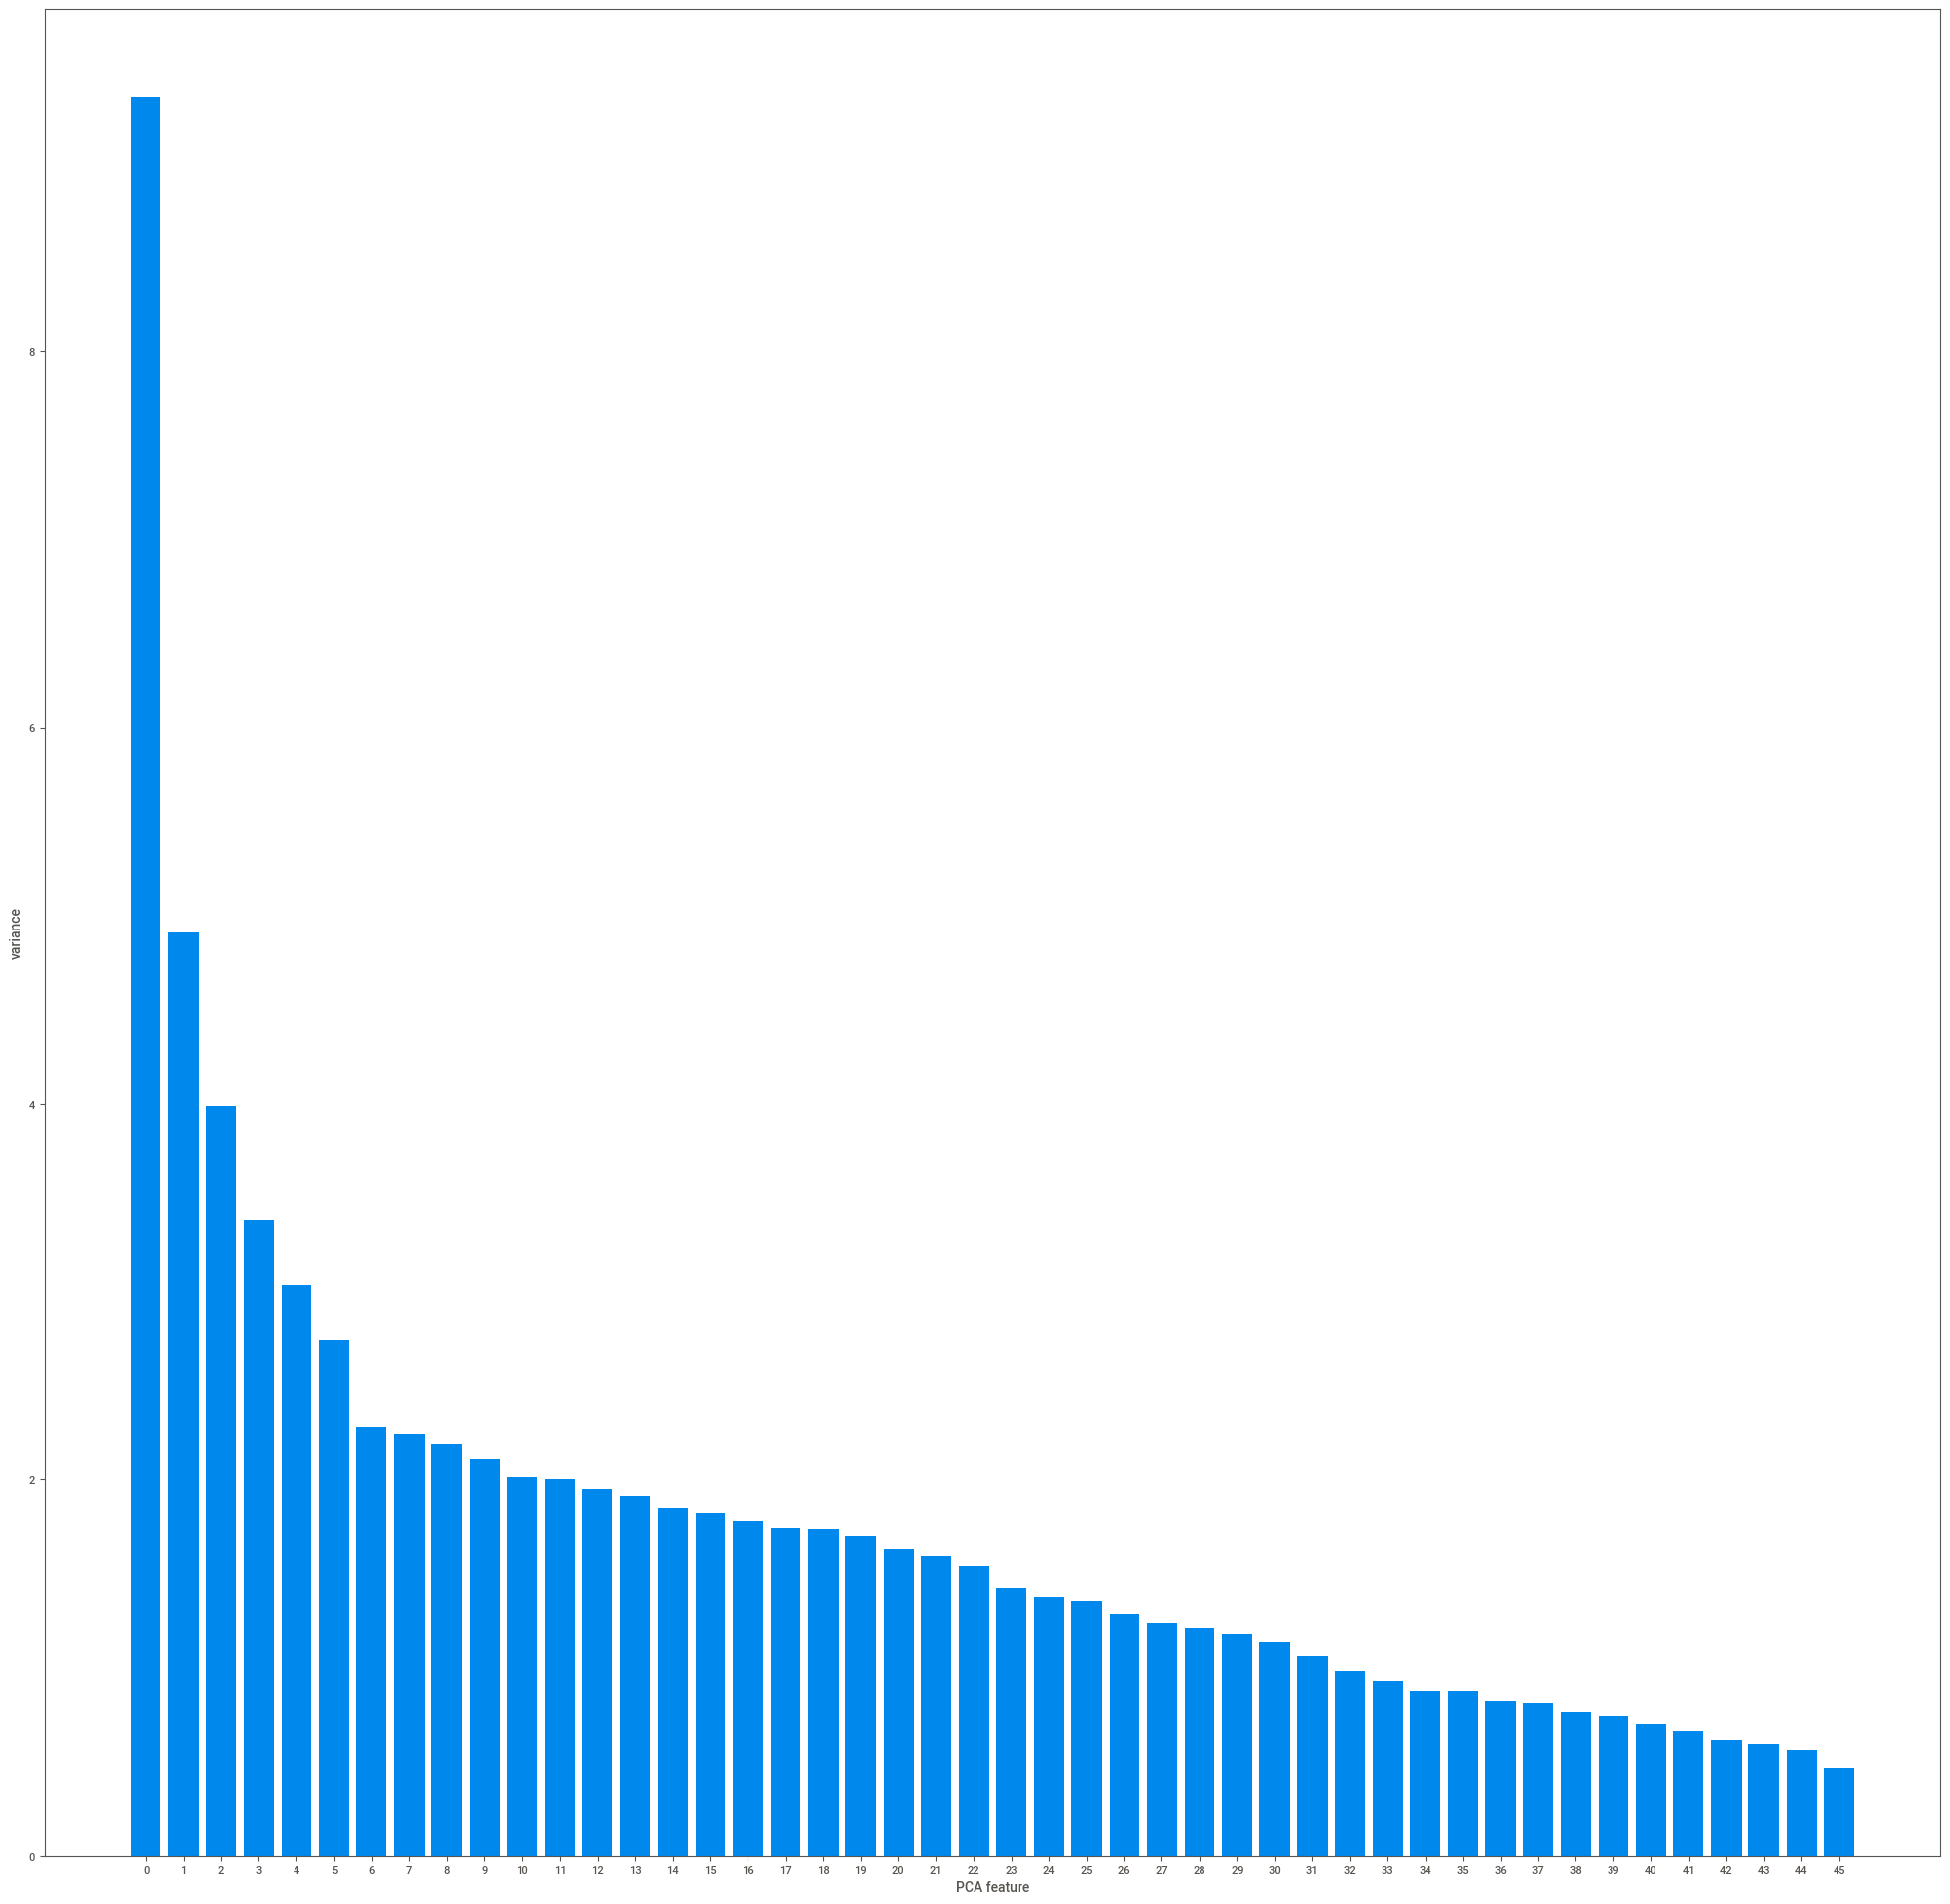

In [12]:
plt.figure(figsize=[25,25])
plt.bar(features_n, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features_n)
plt.show()

In [13]:
pca.explained_variance_ratio_

array([0.1100152 , 0.05778628, 0.04692978, 0.0397625 , 0.03572165,
       0.03225938, 0.02683512, 0.02635834, 0.02575003, 0.02480987,
       0.02367001, 0.02353773, 0.02295952, 0.02251175, 0.0217534 ,
       0.02144571, 0.02090392, 0.02050599, 0.02041063, 0.0199851 ,
       0.01917658, 0.01876783, 0.018087  , 0.01674516, 0.01619929,
       0.01596461, 0.01507047, 0.01454801, 0.01421246, 0.01388223,
       0.01339942, 0.01249422, 0.01157735, 0.010955  , 0.01034402,
       0.01031865, 0.00962969, 0.0095093 , 0.00896643, 0.0087297 ,
       0.00821577, 0.00783597, 0.00727101, 0.00702674, 0.00656288,
       0.00551365])

In [14]:
pca.explained_variance_ratio_.sum()

0.9549153406217402

In [15]:
#45 components explains 95% of the data

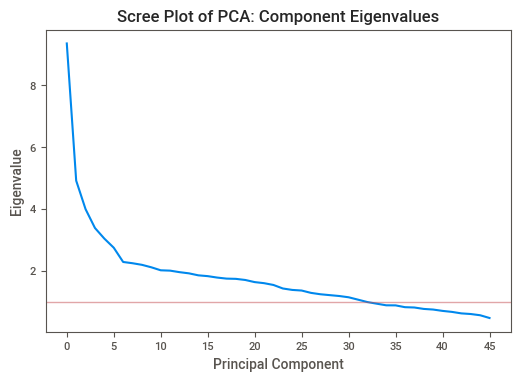

In [16]:
#check the Kaiser criterion for rough estimate to see if these can be trimmed back at all.

def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

In [17]:
#According to the Kaiser criterion above, a better number of components is between 30 - 35 to prevent

In [18]:
#We will use the 95% value for the new dataframe

In [19]:
prin_Df=pd.DataFrame(data = principalDf, 
                     columns = ['pc_1', 'pc_2', 'pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10','pc_11','pc_12','pc_13','pc_14',
                         'pc_15','pc_16','pc_17','pc_18','pc_19','pc_20','pc_21','pc_22','pc_23','pc_24','pc_25','pc_26','pc_27','pc_28',
                         'pc_29','pc_30','pc_31','pc_32','pc_33','pc_34','pc_35','pc_36','pc_37','pc_38','pc_39','pc_40','pc_41','pc_42','pc_43','pc_44','pc_45','pc_46'])

In [20]:
prin_Df.shape

(5822, 46)

In [21]:
y.shape

(5822, 1)

In [22]:
X = np.array(prin_Df)
Y = np.array(y).ravel()

# Train the data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
y_train.shape

(4657,)

In [17]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (4657, 85)
Training Labels Shape: (4657,)
Testing Features Shape: (1165, 85)
Testing Labels Shape: (1165,)


KNeighborsClassifier(n_neighbors=3)
model score: 0.921
model confusion matrix
 [[1073   15]
 [  77    0]]
SVC(C=0.025, probability=True)
model score: 0.934
model confusion matrix
 [[1088    0]
 [  77    0]]
DecisionTreeClassifier()
model score: 0.892
model confusion matrix
 [[1024   64]
 [  62   15]]
RandomForestClassifier()
model score: 0.924
model confusion matrix
 [[1072   16]
 [  72    5]]
AdaBoostClassifier()
model score: 0.932
model confusion matrix
 [[1083    5]
 [  74    3]]
GradientBoostingClassifier()
model score: 0.931
model confusion matrix
 [[1084    4]
 [  76    1]]


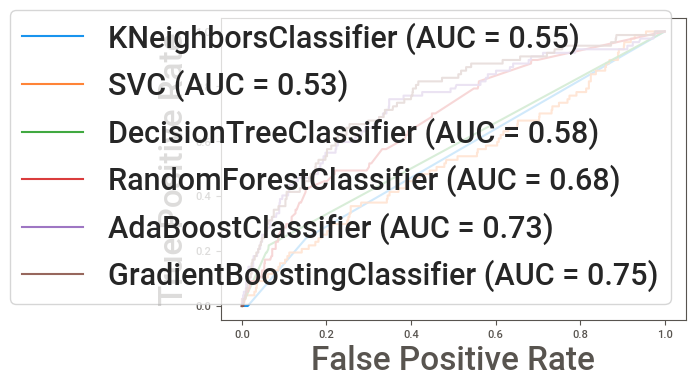

In [18]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    
    ]

for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    
    predictions = classifier.predict(X_test)
    print(classifier)
    print("model score: %.3f" % model.score(X_test, y_test))
    print("model confusion matrix" '\n', confusion_matrix(y_test, predictions))
    ax = plt.gca()
    disp = plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.9)

/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/brendanganji/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

LR: 0.939229 (0.004901)
LDA: 0.934934 (0.007688)
KNN: 0.938370 (0.006194)
CART: 0.893279 (0.004724)
NB: 0.172415 (0.029142)


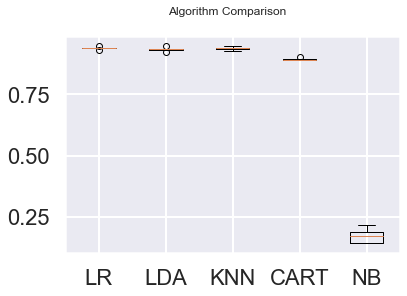

In [11]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
# prepare configuration for cross validation test harness
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

rfC = RandomForestClassifier()


model_rfC = rfC.fit(X_train, y_train)
C_score = rfC.score(X_test, y_test)


NameError: name 'X_train' is not defined

In [13]:
feature_importances = pd.DataFrame(rfC.feature_importances_,
                                   index = features.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfR = RandomForestRegressor()

model_rfR = rfR.fit(X_train, y_train)
y_pred_rfR = rfR.predict(X_test)

In [24]:
len(prin_Df)

5822

In [25]:
y_pred

array([0.  , 0.03, 0.01, ..., 0.01, 0.14, 0.  ])

In [26]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = prin_Df.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

ModuleNotFoundError: No module named 'pydot'

In [27]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
y_bool_pred = (y_pred > .5).astype(int)

In [29]:
y_bool_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_bool_pred))
print(classification_report(y_test,y_bool_pred))
print(accuracy_score(y_test, y_bool_pred))

[[1058   30]
 [  72    5]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1088
           1       0.14      0.06      0.09        77

    accuracy                           0.91      1165
   macro avg       0.54      0.52      0.52      1165
weighted avg       0.88      0.91      0.90      1165

0.9124463519313305


In [32]:
y_bool_pred.features()

AttributeError: 'numpy.ndarray' object has no attribute 'features'

In [6]:
#
df1 = df.query("CARAVAN > 0")
print (df1)

      MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
41         11         1        3         3         3       2       7       0   
45         38         1        3         3         9       0       5       1   
57         12         1        3         2         3       0       6       0   
97          9         1        2         3         3       0       6       1   
98         36         1        2         4         8       2       4       2   
...       ...       ...      ...       ...       ...     ...     ...     ...   
5756        6         1        5         3         2       2       4       0   
5767        3         2        3         3         1       0       6       1   
5787        8         1        3         3         2       1       5       1   
5797        8         1        4         3         2       0       6       1   
5819       33         1        3         4         8       0       6       0   

      MGODGE  MRELGE  ...  APERSONG  AG

In [8]:
df1.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
41,11,1,3,3,3,2,7,0,0,9,...,0,0,0,2,0,0,1,0,0,1
45,38,1,3,3,9,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,1
57,12,1,3,2,3,0,6,0,3,7,...,0,0,1,1,0,0,0,0,0,1
97,9,1,2,3,3,0,6,1,2,7,...,0,0,0,0,0,0,0,0,0,1
98,36,1,2,4,8,2,4,2,2,7,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df1.()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
MOSTYPE,1.000000,-0.099360,-0.137949,0.006246,0.995323,-0.192908,0.049142,-0.005871,-0.011274,-0.133290,...,0.012683,0.031294,0.072058,-0.122582,0.043603,0.081474,0.051109,0.033741,-0.064697,NaN
MAANTHUI,-0.099360,1.000000,0.259257,-0.090350,-0.107411,-0.019632,-0.024410,-0.120975,0.078714,0.159281,...,-0.017375,0.032478,-0.034902,0.032977,-0.017375,-0.015255,-0.062734,0.043342,0.116271,NaN
MGEMOMV,-0.137949,0.259257,1.000000,-0.491325,-0.119020,0.134067,0.135467,-0.174656,-0.103044,0.408810,...,-0.056285,0.036864,0.030012,0.042949,0.014941,-0.055451,0.029453,0.001565,0.042895,NaN
MGEMLEEF,0.006246,-0.090350,-0.491325,1.000000,-0.001172,-0.091795,0.025444,0.055956,-0.015655,-0.186774,...,-0.000395,-0.000975,-0.069874,-0.017866,-0.000395,-0.001407,0.010398,0.030050,-0.001616,NaN
MOSHOOFD,0.995323,-0.107411,-0.119020,-0.001172,1.000000,-0.190412,0.056907,-0.008678,-0.018238,-0.111254,...,0.000201,0.036449,0.070652,-0.120755,0.035173,0.076266,0.045821,0.031914,-0.061746,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APLEZIER,0.081474,-0.015255,-0.055451,-0.001407,0.076266,-0.031796,-0.024268,0.049694,0.050477,-0.075714,...,0.244632,-0.025300,-0.020597,-0.052021,0.244632,1.000000,-0.037022,0.091589,0.088358,NaN
AFIETS,0.051109,-0.062734,0.029453,0.010398,0.045821,-0.042517,0.045940,0.028269,-0.038633,0.005533,...,-0.010405,0.187042,-0.020900,-0.034231,-0.010405,-0.037022,1.000000,0.054158,-0.042550,NaN
AINBOED,0.033741,0.043342,0.001565,0.030050,0.031914,-0.069918,0.040573,0.036380,-0.058348,-0.157190,...,-0.006481,-0.015992,-0.013019,0.022599,0.444629,0.091589,0.054158,1.000000,-0.026505,NaN
ABYSTAND,-0.064697,0.116271,0.042895,-0.001616,-0.061746,-0.008235,0.070416,0.047703,-0.107761,0.055322,...,-0.011785,0.181733,-0.023672,0.074190,-0.011785,0.088358,-0.042550,-0.026505,1.000000,NaN


In [10]:
#Find the top correlations in the chart above to better understand the dataset.
corr_matrix = df1.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of sol series is the pair with the bigest correlation
print(sol)

PBESAUT   ABESAUT     1.000000e+00
MZFONDS   MZPART      1.000000e+00
PPERSONG  APERSONG    1.000000e+00
PZEILPL   AZEILPL     1.000000e+00
MHHUUR    MHKOOP      1.000000e+00
                          ...     
MRELSA    PPERSAUT    9.119052e-05
MINK3045  AMOTSCO     7.517406e-05
MKOOPKLA  PMOTSCO     6.747829e-17
          AWAOREG     1.248825e-17
          PWAOREG     3.603573e-18
Length: 3240, dtype: float64


# Find what features have no stemming relationships

# Lasso model to find import features

In [20]:
#Lasso using feature_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [64]:
X = df.iloc[:, 0:42]
y = df.iloc[:, -1]

feature_names = df.keys()
print(feature_names)

Index(['Customer Subtype L0', 'Number of houses 1 ñ 10',
       'Avg size household 1 ñ 6', 'Avg age see L1',
       'Customer main type see L2', 'Roman catholic see L3', 'Protestant',
       'Other religion', 'No religion', 'Married', 'Living together',
       'Other relation', 'Singles', 'Household without children',
       'Household with children', 'High level education',
       'Medium level education', 'Lower level education', 'High status',
       'Entrepreneur', 'Farmer', 'Middle management', 'Skilled labourers',
       'Unskilled labourers', 'Social class A', 'Social class B1',
       'Social class B2', 'Social class C', 'Social class D', 'Rented house',
       'Home owners', '1 car', '2 cars', 'No car', 'National Health Service',
       'Private health insurance', 'Income < 30.000', 'Income 30-45.000',
       'Income 45-75.000', 'Income 75-122.000', 'Income >123.000',
       'Average income', 'Purchasing power class',
       'Contribution private third party insurance see L4'